<a href="https://colab.research.google.com/github/gabbosanti/machine-learning-lab/blob/main/slides/lab-04-housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The [`California Housing`](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) case study

Our task is to use California census data to forecast housing prices given the population, median income, and median housing price for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
We will just call them "districts" for short.

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/housing.csv", delimiter=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Profiling

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Descrizione del set di dati

1. `longitude`: misura della distanza in direzione ovest di un'abitazione; un valore più alto indica una maggiore distanza in direzione ovest.
2. `latitude`: misura della distanza in direzione nord di un'abitazione; un valore più alto indica una maggiore distanza in direzione nord.
3. `housing_median_age`: età media delle abitazioni all'interno di un isolato; un numero più basso indica edifici più recenti.
4. `total_rooms`: numero totale di stanze all'interno di un isolato.
5. `total_bedrooms`: numero totale di camere da letto all'interno di un isolato
6. `population`: numero totale di persone che risiedono all'interno di un isolato
7. `households`: numero totale di famiglie, ovvero gruppi di persone che risiedono all'interno di un'unità abitativa, per un isolato
8. `median_income`: reddito medio delle famiglie all'interno di un isolato (misurato in decine di migliaia di dollari statunitensi)
9. `median_house_value`: Valore medio delle case per le famiglie all'interno di un isolato (misurato in dollari statunitensi)
10. `ocean_poximity`: Posizione della casa rispetto all'oceano/mare


# Profiling

In [3]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


# ... from the previous laboratory

1. Missing values
1. Categorical features --> ENCODING
1. Different feature scales --> SCALING

# Missing values

There are some missing values for `total_bedrooms`. What should we do?

Most Machine Learning algorithms cannot work with missing features. We have three options:

- Get rid of the corresponding districts (i.e., drop the rows)
    - `df.dropna(subset=["total_bedrooms"])`
- Get rid of the whole attribute (i.e., drop the columns)
    - `df.drop("total_bedrooms", axis=1)`
- Set the values to some value (zero, the mean, the median, etc.)
    - `df["total_bedrooms"].fillna(df["total_bedrooms"].mean())`

# Non-numeric attributes

`ocean_proximity` is a text attribute so we cannot compute its median. Some options:

- Get rid of the whole attribute.
    - `df.drop("ocean_proximity", axis=1)`
- Change from categorical to *ordinal* (e.g., `NEAR BAY` = 0, `INLAND` = 1)
    - ML algorithms will assume that two nearby values are more similar than two distant values.
    - This may be fine in some cases (e.g., for ordered categories such as `"bad"`, `"average"`, `"good"`, `"excellent"`)
- Change from categorical to *one hot encoding*
    - Create one binary attribute per category: one attribute equal to 1 when the category is `"<1H OCEAN"` (and 0 otherwise),
    - ... another attribute equal to 1 when the category is `"INLAND"` (and 0 otherwise), and so on.
    - Only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
    - The new attributes are sometimes called dummy attributes

# `ocean_proximity`
E' un attributo non numerico (categorico) su cui dovranno essere fatte delle scelte.

In [4]:
df["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


<Axes: >

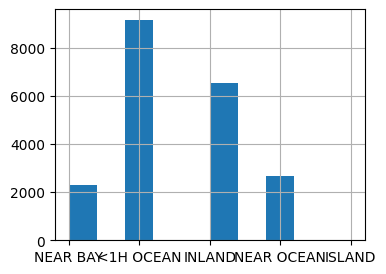

In [6]:
plt.figure(figsize=(4, 3))
df["ocean_proximity"].hist()

# Encoding: da cathegorical a ordinal


In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit_transform(df[["ocean_proximity"]])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0


# Encoding: one-hot encoding

In [8]:
pd.get_dummies(df["ocean_proximity"], prefix='ocean_proximity')

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


# Scaling: Min-max normalization

In [14]:
num_df = df.drop(columns=['ocean_proximity', 'median_house_value']) #rimuovo le colonne NON numeriche
normalized_df = (num_df - num_df.min()) / (num_df.max() - num_df.min())
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295


# Scaling: Standardization

In [15]:
num_df = df.drop(columns=['ocean_proximity', 'median_house_value'])
normalized_df = (num_df - num_df.mean()) / num_df.std()
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388886,-0.512579,-0.443438,-1.216099
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.920466,-0.944382,-1.008396,-0.691576
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.125468,-0.369528,-0.174037,-1.142566
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.305826,-0.604415,-0.393743,-1.054557


# Feature selection

<Axes: >

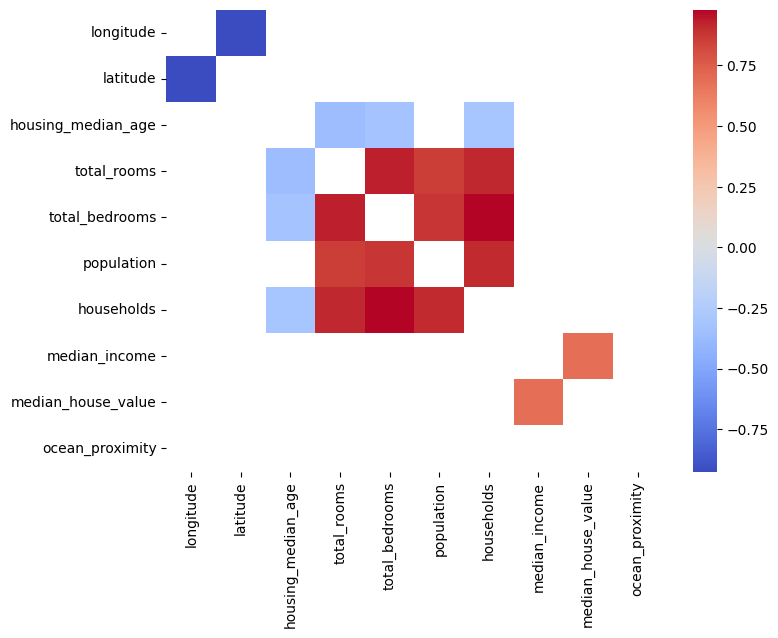

In [16]:
rho = df.corr(method='pearson', numeric_only=True)
min_corr = 0.3 #se la correlazione tra due variabili è sotto a questo valore, non mostrarla
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(8, 6))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True))

There are some variables that are highly correlated

- `total_rooms`, `total_bedrooms`, `population`, `households`
- `latitude`, `longitude`

What should we do?

# Exercise

1. Add a new column: `population_per_household = population / households`
1. Add a new column: `rooms_per_household = total_rooms / households`
1. Add a new column: `bedrooms_per_room = total_bedrooms / total_rooms`
1. Filling in (i.e., impute) missing values with the median value
1. Apply standardization to all the numeric columns
1. One hot encode `ocean_proximity` since it is a categorical attribute

In [19]:
#1
df['population_per_household'] = df['population'] / df['households']
#2
df['rooms_per_household'] = df['total_rooms'] / df['households']
#3
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
#4
df["total_bedrooms"].fillna(df["total_bedrooms"].median())
#5
num_df = df.drop(columns=['ocean_proximity', 'median_house_value'])
normalized_df = (num_df - num_df.mean()) / num_df.std()
#6
pd.get_dummies(df["ocean_proximity"], prefix='ocean_proximity')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,population_per_household,rooms_per_household,bedrooms_per_room
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709,-0.049595,0.628544,-1.145996
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181,-0.092510,0.327033,-0.987230
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656,-0.025842,1.155592,-1.440479
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945,-0.050328,0.156962,-0.492913
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881,-0.085614,0.344702,-0.706124
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388886,-0.512579,-0.443438,-1.216099,-0.049109,-0.155020,0.199815
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.920466,-0.944382,-1.008396,-0.691576,0.005021,0.276874,0.037411
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.125468,-0.369528,-0.174037,-1.142566,-0.071733,-0.090316,0.036807
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.305826,-0.604415,-0.393743,-1.054557,-0.091223,-0.040210,0.118202
